# Summit County Sales Data sorted by Edgewood and Cascade Village (half mile boundaries) and Akron City

In [239]:
import pandas as pd
import numpy as np
from dateutil.parser import parse
import matplotlib.pyplot as plt
%matplotlib inline

# load the sales data, parsing the date
df = pd.read_csv('master.csv')

plt.style.use('fivethirtyeight')

##Chart 1: number of sales by year

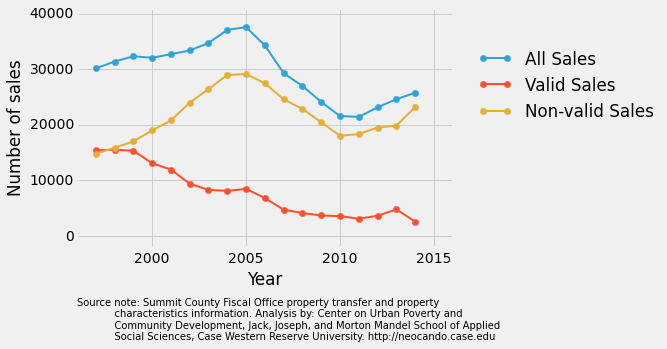

In [240]:
valid = df[(df.sale_valid=='1') & (df.year > 1996) & (df.year < 2015)].groupby('year').size()
all_sales = df[(df.year > 1996) & (df.year < 2015)].groupby('year').size()
data = valid.values*1.0/all_sales*100

chart1 = pd.DataFrame(index=all_sales.index)
chart1['all_sales'] = all_sales.values
chart1['valid_sales'] = valid.values
chart1['non_valid_sales'] = all_sales.values - valid.values
chart1.to_csv('charts/chart1.csv')

plt.plot(all_sales.index, all_sales.values,  '.-', markersize=12,linewidth=2)
plt.plot(valid.index, valid.values,  '.-', markersize=12,linewidth=2)
plt.plot(all_sales.index, all_sales.values-valid.values,  '.-', markersize=12,linewidth=2)

# plt.title('Number of residential sales by year', y=1.08)
plt.legend(['All Sales','Valid Sales','Non-valid Sales'],loc=(1.05,0.5))
plt.xlabel('Year')
plt.ylabel('Number of sales')
plt.xlim([1996,2016])
plt.ylim([-2000,41000])

plt.annotate("Source note: Summit County Fiscal Office property transfer and property \n\
            characteristics information. Analysis by: Center on Urban Poverty and \n\
            Community Development, Jack, Joseph, and Morton Mandel School of Applied \n\
            Social Sciences, Case Western Reserve University. http://neocando.case.edu", \
             (0,0), (0, -50), fontsize=10, xycoords='axes fraction', textcoords='offset points', va='top')

plt.savefig('charts/chart1.png',bbox_inches='tight')

In [241]:
valid = df[(df.sale_price>0) & (df.sale_valid=='1') & (df.year > 1996) & (df.year < 2015)]
all_sales = df[(df.year > 1996) & (df.year < 2015)]
custom = df[(df.sale_price>0) & (df.sale_valid.isin(['1','8','B','C','F','G','L','N','P','S','U','V','X','Z'])) & (df.year > 1996) & (df.year < 2015)]

In [242]:
def q2(x):
    return x.quantile(.25)
def q3(x):
    return x.quantile(.5)
def q4(x):
    return x.quantile(.75)

def get_by_year(df, zone, region):
    return df.loc[(df['CLASS']==zone) & (df[region]==1),['sale_price', 'year']].groupby('year').aggregate([np.median, len, np.average, min, q2, q3, q4, max])

##Chart 2-0: residential turnover by year, valid sales only (sale_valid = 1)

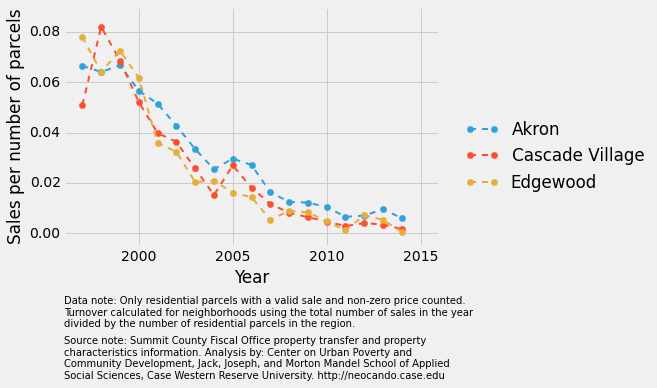

In [243]:
cv_by_year = get_by_year(valid, 'R', 'cascade_village')
ed_by_year = get_by_year(valid, 'R', 'edgewood')
ak_by_year = get_by_year(valid, 'R', 'akron')

chart2_0 = pd.DataFrame(index=ak_by_year.index)
chart2_0['ak_turnover'] = ak_by_year.sale_price['len']*1.0/len(set(df[(df.akron==1) & (df.CLASS=='R')].parcel_id))
chart2_0['cv_turnover'] = cv_by_year.sale_price['len']*1.0/len(set(df[(df.cascade_village==1) & (df.CLASS=='R')].parcel_id))
chart2_0['ed_turnover'] =  ed_by_year.sale_price['len']*1.0/len(set(df[(df.edgewood==1) & (df.CLASS=='R')].parcel_id))
chart2_0.to_csv('charts/chart2-0.csv')

ax = plt.subplot(111)
plt.plot(chart2_0.index, chart2_0.ak_turnover, '.--', markersize=12,linewidth=2)
plt.plot(chart2_0.index, chart2_0.cv_turnover, '.--', markersize=12,linewidth=2)
plt.plot(chart2_0.index, chart2_0.ed_turnover, '.--', markersize=12,linewidth=2)

plt.legend(['Akron','Cascade Village','Edgewood'], loc=(1.05,0.2))
plt.xlabel('Year')
plt.ylabel('Sales per number of parcels')
plt.xlim([1996,2016])
plt.ylim([-0.005,0.09])

plt.annotate("Data note: Only residential parcels with a valid sale and non-zero price counted.\n\
Turnover calculated for neighborhoods using the total number of sales in the year \n\
divided by the number of residential parcels in the region.", (0,0), (0, -50), fontsize=10, xycoords='axes fraction', textcoords='offset points', va='top')

plt.annotate("Source note: Summit County Fiscal Office property transfer and property \n\
characteristics information. Analysis by: Center on Urban Poverty and \n\
Community Development, Jack, Joseph, and Morton Mandel School of Applied \n\
Social Sciences, Case Western Reserve University. http://neocando.case.edu", (0,0), (0, -90), fontsize=10, xycoords='axes fraction', textcoords='offset points', va='top')

plt.savefig('charts/chart2-0.png',bbox_inches='tight')

##Chart 2-1: residential turnover by year, custom valid sales

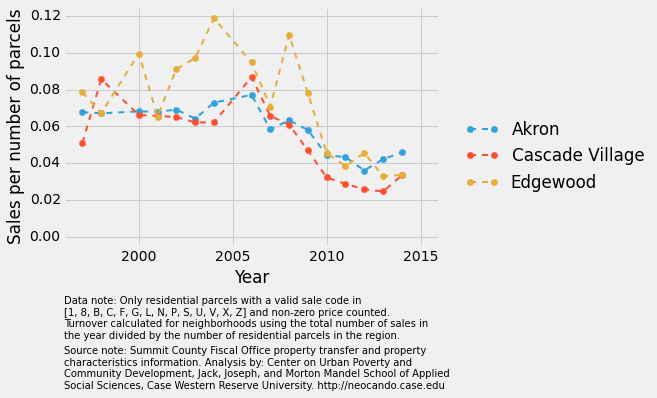

In [245]:
cv_by_year = get_by_year(custom, 'R', 'cascade_village')
ed_by_year = get_by_year(custom, 'R', 'edgewood')
ak_by_year = get_by_year(custom, 'R', 'akron')

chart2_1 = pd.DataFrame(index=all_sales.index)
chart2_1['ak_turnover'] = ak_by_year.sale_price['len']/len(set(df[(df.akron==1) & (df.CLASS=='R')].parcel_id))
chart2_1['cv_turnover'] = cv_by_year.sale_price['len']/len(set(df[(df.cascade_village==1) & (df.CLASS=='R')].parcel_id))
chart2_1['ed_turnover'] =  ed_by_year.sale_price['len']/len(set(df[(df.edgewood==1) & (df.CLASS=='R')].parcel_id))
chart2_1.to_csv('charts/chart2-1.csv')

ax = plt.subplot(111)
plt.plot(chart2_1.index, chart2_1.ak_turnover, '.--', markersize=12,linewidth=2)
plt.plot(chart2_1.index, chart2_1.cv_turnover, '.--', markersize=12,linewidth=2)
plt.plot(chart2_1.index, chart2_1.ed_turnover, '.--', markersize=12,linewidth=2)

plt.legend(['Akron','Cascade Village','Edgewood'], loc=(1.05,0.2))
plt.xlabel('Year')
plt.ylabel('Sales per number of parcels')
plt.xlim([1996,2016])
plt.ylim([-0.005,0.125])

plt.annotate("Data note: Only residential parcels with a valid sale code in \n\
[1, 8, B, C, F, G, L, N, P, S, U, V, X, Z] and non-zero price counted.\n\
Turnover calculated for neighborhoods using the total number of sales in\n\
the year divided by the number of residential parcels in the region.",\
             (0,0), (0, -50), fontsize=10, xycoords='axes fraction', textcoords='offset points', va='top')

plt.annotate("Source note: Summit County Fiscal Office property transfer and property \n\
characteristics information. Analysis by: Center on Urban Poverty and \n\
Community Development, Jack, Joseph, and Morton Mandel School of Applied \n\
Social Sciences, Case Western Reserve University. http://neocando.case.edu", (0,0), (0, -100), fontsize=10, xycoords='axes fraction', textcoords='offset points', va='top')

plt.savefig('charts/chart2-1.png',bbox_inches='tight')

##Chart 3-0: median residential sales price by year (valid sales only)

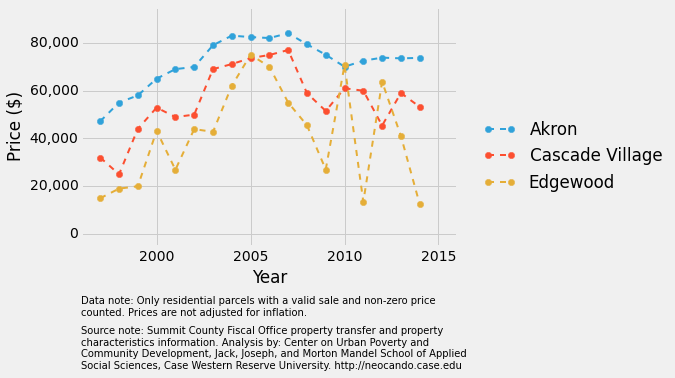

In [246]:
ak_by_year = get_by_year(valid, 'R', 'akron')
cv_by_year = get_by_year(valid, 'R', 'cascade_village')
ed_by_year = get_by_year(valid, 'R', 'edgewood')

ak_by_year = ak_by_year.rename(columns={'sale_price':'ak_sale_price'})
cv_by_year = cv_by_year.rename(columns={'sale_price':'cv_sale_price'})
ed_by_year = ed_by_year.rename(columns={'sale_price':'ed_sale_price'})

pd.concat([ak_by_year, cv_by_year, ed_by_year], axis=1).to_csv('charts/chart3-0.csv')

chart3_0 = pd.DataFrame(index=ed_by_year.index)
chart3_0['ak_median_sale_price'] = ak_by_year.ak_sale_price['median']
chart3_0['cv_median_sale_price'] = cv_by_year.cv_sale_price['median']
chart3_0['ed_median_sale_price'] = ed_by_year.ed_sale_price['median']
chart3_0.to_csv('charts/chart3-0.csv')

ax = plt.subplot(111)
plt.plot(chart3_0.index, chart3_0.ak_median_sale_price, '.--', markersize=12,linewidth=2)
plt.plot(chart3_0.index, chart3_0.cv_median_sale_price, '.--', markersize=12,linewidth=2)
plt.plot(chart3_0.index, chart3_0.ed_median_sale_price, '.--', markersize=12,linewidth=2)

plt.legend(['Akron','Cascade Village','Edgewood'], loc=(1.05,0.2))
plt.xlabel('Year')
plt.ylabel('Price ($)')
plt.xlim([1996,2016])
plt.ylim(-5000,95000)

plt.annotate("Data note: Only residential parcels with a valid sale and non-zero price\n\
counted. Prices are not adjusted for inflation.", (0,0), (0, -50), fontsize=10, xycoords='axes fraction', textcoords='offset points', va='top')

plt.annotate("Source note: Summit County Fiscal Office property transfer and property \n\
characteristics information. Analysis by: Center on Urban Poverty and \n\
Community Development, Jack, Joseph, and Morton Mandel School of Applied \n\
Social Sciences, Case Western Reserve University. http://neocando.case.edu", (0,0), (0, -80), fontsize=10, xycoords='axes fraction', textcoords='offset points', va='top')

ax.get_yaxis().set_major_formatter(plt.matplotlib.ticker.FuncFormatter(lambda x, p: format(int(x), ',')))
plt.savefig('charts/chart3-0.png',bbox_inches='tight')

##Chart 3-1: median residential sales price by year (custom valid sales)

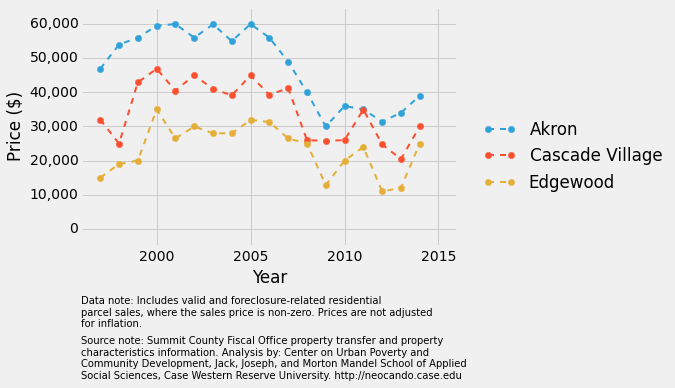

In [247]:
ak_by_year = get_by_year(custom, 'R', 'akron')
cv_by_year = get_by_year(custom, 'R', 'cascade_village')
ed_by_year = get_by_year(custom, 'R', 'edgewood')

ak_by_year = ak_by_year.rename(columns={'sale_price':'ak_sale_price'})
cv_by_year = cv_by_year.rename(columns={'sale_price':'cv_sale_price'})
ed_by_year = ed_by_year.rename(columns={'sale_price':'ed_sale_price'})

pd.concat([ak_by_year, cv_by_year, ed_by_year], axis=1).to_csv('charts/chart3-1.csv')

chart3_1 = pd.DataFrame(index=ed_by_year.index)
chart3_1['ak_median_sale_price'] = ak_by_year.ak_sale_price['median']
chart3_1['cv_median_sale_price'] = cv_by_year.cv_sale_price['median']
chart3_1['ed_median_sale_price'] = ed_by_year.ed_sale_price['median']

ax = plt.subplot(111)
plt.plot(chart3_1.index, chart3_1.ak_median_sale_price, '.--', markersize=12,linewidth=2)
plt.plot(chart3_1.index, chart3_1.cv_median_sale_price, '.--', markersize=12,linewidth=2)
plt.plot(chart3_1.index, chart3_1.ed_median_sale_price, '.--', markersize=12,linewidth=2)

plt.legend(['Akron','Cascade Village','Edgewood'], loc=(1.05,0.2))
plt.xlabel('Year')
plt.ylabel('Price ($)')
plt.xlim([1996,2016])
plt.ylim(-5000,65000)

plt.annotate("Data note: Includes valid and foreclosure-related residential \n\
parcel sales, where the sales price is non-zero. Prices are not adjusted\n\
for inflation.", (0,0), (0, -50), fontsize=10, xycoords='axes fraction', textcoords='offset points', va='top')

plt.annotate("Source note: Summit County Fiscal Office property transfer and property \n\
characteristics information. Analysis by: Center on Urban Poverty and \n\
Community Development, Jack, Joseph, and Morton Mandel School of Applied \n\
Social Sciences, Case Western Reserve University. http://neocando.case.edu", (0,0), (0, -90), fontsize=10, xycoords='axes fraction', textcoords='offset points', va='top')

ax.get_yaxis().set_major_formatter(plt.matplotlib.ticker.FuncFormatter(lambda x, p: format(int(x), ',')))
plt.savefig('charts/chart3-1.png',bbox_inches='tight')

##Chart 3-2: median residential sales price by custom time periods (valid sales only)

In [248]:
ak_by_year = get_by_year(valid, 'R', 'akron')

ed2 = pd.DataFrame(index=['Demo','Reoccupancy','Completion'], columns=['total','median','average','years','middle_year'])
cv2 = pd.DataFrame(index=['Demo','Reoccupancy','Completion'], columns=['total','median','average','years','middle_year'])

df_sub = valid[(valid['CLASS']=='R') & (valid['edgewood']==1)]

ed2['total'].ix['Demo'] = len(df_sub[(df_sub.year>=1998)&(df_sub.year<=2007)])
ed2['median'].ix['Demo'] = np.median(df_sub[(df_sub.year>=1998)&(df_sub.year<=2007)].sale_price)
ed2['average'].ix['Demo'] = np.mean(df_sub[(df_sub.year>=1998)&(df_sub.year<=2007)].sale_price)
ed2['years'].ix['Demo'] = 10
ed2['middle_year'].ix['Demo'] = 2002.5

ed2['total'].ix['Reoccupancy'] = len(df_sub[(df_sub.year>=2008)&(df_sub.year<=2012)])
ed2['median'].ix['Reoccupancy'] = np.median(df_sub[(df_sub.year>=2008)&(df_sub.year<=2012)].sale_price)
ed2['average'].ix['Reoccupancy'] = np.mean(df_sub[(df_sub.year>=2008)&(df_sub.year<=2012)].sale_price)
ed2['years'].ix['Reoccupancy'] = 5
ed2['middle_year'].ix['Reoccupancy'] = 2010

ed2['total'].ix['Completion'] = len(df_sub[(df_sub.year>=2013)&(df_sub.year<=2014)])
ed2['median'].ix['Completion'] = np.median(df_sub[(df_sub.year>=2013)&(df_sub.year<=2014)].sale_price)
ed2['average'].ix['Completion'] = np.mean(df_sub[(df_sub.year>=2013)&(df_sub.year<=2014)].sale_price)
ed2['years'].ix['Completion'] = 2
ed2['middle_year'].ix['Completion'] = 2013.5

df_sub = valid[(valid['CLASS']=='R') & (valid['cascade_village']==1)]

cv2['total'].ix['Demo'] = len(df_sub[(df_sub.year>=1998)&(df_sub.year<=2004)])
cv2['median'].ix['Demo'] = np.median(df_sub[(df_sub.year>=1998)&(df_sub.year<=2004)].sale_price)
cv2['average'].ix['Demo'] = np.mean(df_sub[(df_sub.year>=1998)&(df_sub.year<=2004)].sale_price)
cv2['years'].ix['Demo'] = 7
cv2['middle_year'].ix['Demo'] = 2001

cv2['total'].ix['Reoccupancy'] = len(df_sub[(df_sub.year>=2005)&(df_sub.year<=2009)])
cv2['median'].ix['Reoccupancy'] = np.median(df_sub[(df_sub.year>=2005)&(df_sub.year<=2009)].sale_price)
cv2['average'].ix['Reoccupancy'] = np.mean(df_sub[(df_sub.year>=2005)&(df_sub.year<=2009)].sale_price)
cv2['years'].ix['Reoccupancy'] = 5
cv2['middle_year'].ix['Reoccupancy'] = 2007

cv2['total'].ix['Completion'] = len(df_sub[(df_sub.year>=2010)&(df_sub.year<=2014)])
cv2['median'].ix['Completion'] = np.median(df_sub[(df_sub.year>=2010)&(df_sub.year<=2014)].sale_price)
cv2['average'].ix['Completion'] = np.mean(df_sub[(df_sub.year>=2010)&(df_sub.year<=2014)].sale_price)
cv2['years'].ix['Completion'] = 5
cv2['middle_year'].ix['Completion'] = 2012

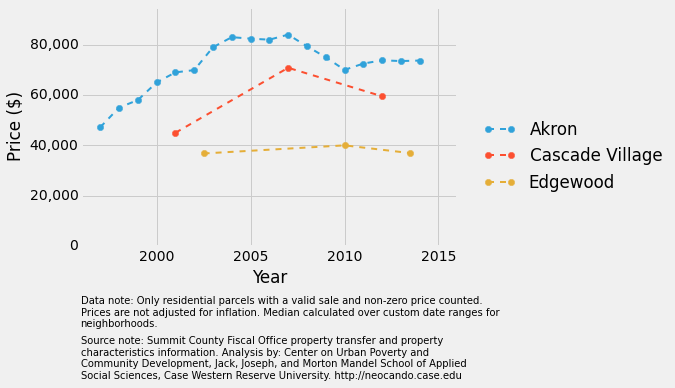

In [249]:
chart3_2 = pd.DataFrame(index=ak_by_year.index)
chart3_2['ak_median_custom'] = ak_by_year.sale_price['median']
chart3_2.loc[chart3_2.index.isin(cv2.middle_year.values),'cv_median_custom'] = (cv2['median']).values
chart3_2.loc[chart3_2.index.isin([2003,2010,2014]),'ed_median_custom'] =  (ed2['median']).values
chart3_2.to_csv('charts/chart3-2.csv')

ax = plt.subplot(111)
plt.plot(ak_by_year.index, ak_by_year.sale_price['median'],  '.--', markersize=12,linewidth=2)
plt.plot(cv2.middle_year, cv2['median'], '.--', markersize=12,linewidth=2)
plt.plot(ed2.middle_year, ed2['median'], '.--', markersize=12,linewidth=2)

# plt.title('Median home price', y=1.08, x=.78)
plt.legend(['Akron','Cascade Village','Edgewood'], loc=(1.05,0.2))
plt.xlabel('Year')
plt.ylabel('Price ($)')
plt.xlim([1996,2016])
plt.ylim(0,95000)
ax.get_yaxis().set_major_formatter(plt.matplotlib.ticker.FuncFormatter(lambda x, p: format(int(x), ',')))

plt.annotate("Data note: Only residential parcels with a valid sale and non-zero price counted.\n\
Prices are not adjusted for inflation. Median calculated over custom date ranges for\n\
neighborhoods.", (0,0), (0, -50), fontsize=10, xycoords='axes fraction', textcoords='offset points', va='top')

plt.annotate("Source note: Summit County Fiscal Office property transfer and property \n\
characteristics information. Analysis by: Center on Urban Poverty and \n\
Community Development, Jack, Joseph, and Morton Mandel School of Applied \n\
Social Sciences, Case Western Reserve University. http://neocando.case.edu", (0,0), (0, -90), fontsize=10, xycoords='axes fraction', textcoords='offset points', va='top')

plt.savefig('charts/chart3-2.png',bbox_inches='tight')

## Chart 2-2: residential turnover by custom time periods (valid sales only)

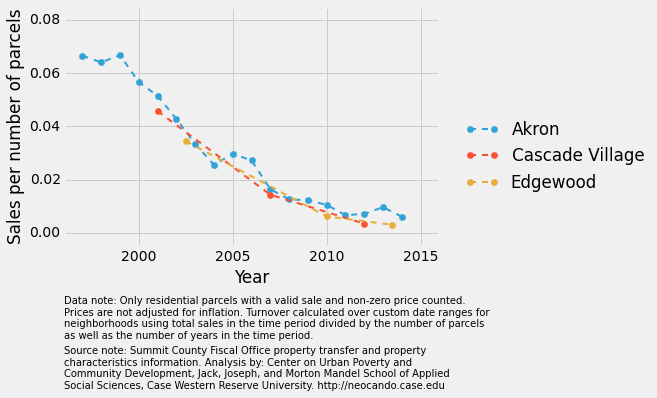

In [250]:
chart2_2 = pd.DataFrame(index=ak_by_year.index)
chart2_2['ak_turnover_custom'] = ak_by_year.sale_price['len']/len(set(df[df.akron==1].parcel_id))
chart2_2.loc[chart2_2.index.isin(cv2.middle_year.values),'cv_turnover_custom'] = (cv2['total']*1.0/cv2['years']/len(set(df[df.cascade_village==1].parcel_id))).values
chart2_2.loc[chart2_2.index.isin([2003,2010,2014]),'ed_turnover_custom'] =  (ed2['total']*1.0/ed2['years']/len(set(df[df.edgewood==1].parcel_id))).values
# chart2_2.to_csv('charts/chart2-2.csv')

ax = plt.subplot(111)
plt.plot(ak_by_year.index, ak_by_year.sale_price['len']/len(set(df[(df.akron==1) & (df.CLASS=='R')].parcel_id)),  '.--', markersize=12,linewidth=2)
plt.plot(cv2.middle_year, cv2['total']*1.0/cv2['years']/len(set(df[(df.cascade_village==1) & (df.CLASS=='R')].parcel_id)), '.--', markersize=12,linewidth=2)
plt.plot(ed2.middle_year, ed2['total']*1.0/ed2['years']/len(set(df[(df.edgewood==1) & (df.CLASS=='R')].parcel_id)), '.--', markersize=12,linewidth=2)

plt.legend(['Akron','Cascade Village','Edgewood'], loc=(1.05,0.2))
plt.xlabel('Year')
plt.ylabel('Sales per number of parcels')
plt.xlim([1996,2016])
plt.ylim([-0.005,0.085])

plt.annotate("Data note: Only residential parcels with a valid sale and non-zero price counted.\n\
Prices are not adjusted for inflation. Turnover calculated over custom date ranges for\n\
neighborhoods using total sales in the time period divided by the number of parcels \n\
as well as the number of years in the time period.", (0,0), (0, -50), fontsize=10, xycoords='axes fraction', textcoords='offset points', va='top')

plt.annotate("Source note: Summit County Fiscal Office property transfer and property \n\
characteristics information. Analysis by: Center on Urban Poverty and \n\
Community Development, Jack, Joseph, and Morton Mandel School of Applied \n\
Social Sciences, Case Western Reserve University. http://neocando.case.edu", (0,0), (0, -100), fontsize=10, xycoords='axes fraction', textcoords='offset points', va='top')

plt.savefig('charts/chart2-2.png',bbox_inches='tight')

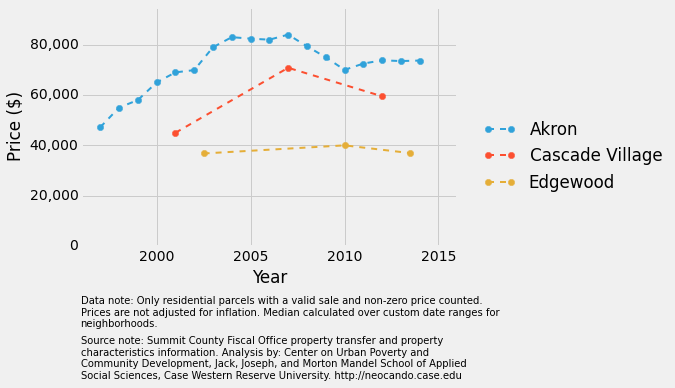

In [251]:
ax = plt.subplot(111)
plt.plot(ak_by_year.index, ak_by_year.sale_price['median'],  '.--', markersize=12,linewidth=2)
plt.plot(cv2.middle_year, cv2['median'], '.--', markersize=12,linewidth=2)
plt.plot(ed2.middle_year, ed2['median'], '.--', markersize=12,linewidth=2)
# plt.plot(sales_by_year.index, sales_by_year.sale_price['average'], '--', markersize=8)

# plt.title('Median home price', y=1.08, x=.78)
plt.legend(['Akron','Cascade Village','Edgewood'], loc=(1.05,0.2))
plt.xlabel('Year')
plt.ylabel('Price ($)')
plt.xlim([1996,2016])
plt.ylim(0,95000)
ax.get_yaxis().set_major_formatter(plt.matplotlib.ticker.FuncFormatter(lambda x, p: format(int(x), ',')))

plt.annotate("Data note: Only residential parcels with a valid sale and non-zero price counted.\n\
Prices are not adjusted for inflation. Median calculated over custom date ranges for\n\
neighborhoods.", (0,0), (0, -50), fontsize=10, xycoords='axes fraction', textcoords='offset points', va='top')

plt.annotate("Source note: Summit County Fiscal Office property transfer and property \n\
characteristics information. Analysis by: Center on Urban Poverty and \n\
Community Development, Jack, Joseph, and Morton Mandel School of Applied \n\
Social Sciences, Case Western Reserve University. http://neocando.case.edu", (0,0), (0, -90), fontsize=10, xycoords='axes fraction', textcoords='offset points', va='top')

# plt.savefig('charts/chart4.png',bbox_inches='tight')

## Charts 3-3: median residential sales price by custom time periods (custom valid sales)

In [252]:
ak_by_year = get_by_year(custom, 'R', 'akron')

ed2 = pd.DataFrame(index=['Demo','Reoccupancy','Completion'], columns=['total','median','average','years','middle_year'])
cv2 = pd.DataFrame(index=['Demo','Reoccupancy','Completion'], columns=['total','median','average','years','middle_year'])

df_sub = custom[(custom['CLASS']=='R') & (custom['edgewood']==1)]

ed2['total'].ix['Demo'] = len(df_sub[(df_sub.year>=1998)&(df_sub.year<=2007)])
ed2['median'].ix['Demo'] = np.median(df_sub[(df_sub.year>=1998)&(df_sub.year<=2007)].sale_price)
ed2['average'].ix['Demo'] = np.mean(df_sub[(df_sub.year>=1998)&(df_sub.year<=2007)].sale_price)
ed2['years'].ix['Demo'] = 10
ed2['middle_year'].ix['Demo'] = 2002.5

ed2['total'].ix['Reoccupancy'] = len(df_sub[(df_sub.year>=2008)&(df_sub.year<=2012)])
ed2['median'].ix['Reoccupancy'] = np.median(df_sub[(df_sub.year>=2008)&(df_sub.year<=2012)].sale_price)
ed2['average'].ix['Reoccupancy'] = np.mean(df_sub[(df_sub.year>=2008)&(df_sub.year<=2012)].sale_price)
ed2['years'].ix['Reoccupancy'] = 5
ed2['middle_year'].ix['Reoccupancy'] = 2010

ed2['total'].ix['Completion'] = len(df_sub[(df_sub.year>=2013)&(df_sub.year<=2014)])
ed2['median'].ix['Completion'] = np.median(df_sub[(df_sub.year>=2013)&(df_sub.year<=2014)].sale_price)
ed2['average'].ix['Completion'] = np.mean(df_sub[(df_sub.year>=2013)&(df_sub.year<=2014)].sale_price)
ed2['years'].ix['Completion'] = 2
ed2['middle_year'].ix['Completion'] = 2013.5

df_sub = custom[(custom['CLASS']=='R') & (custom['cascade_village']==1)]

cv2['total'].ix['Demo'] = len(df_sub[(df_sub.year>=1998)&(df_sub.year<=2004)])
cv2['median'].ix['Demo'] = np.median(df_sub[(df_sub.year>=1998)&(df_sub.year<=2004)].sale_price)
cv2['average'].ix['Demo'] = np.mean(df_sub[(df_sub.year>=1998)&(df_sub.year<=2004)].sale_price)
cv2['years'].ix['Demo'] = 7
cv2['middle_year'].ix['Demo'] = 2001

cv2['total'].ix['Reoccupancy'] = len(df_sub[(df_sub.year>=2005)&(df_sub.year<=2009)])
cv2['median'].ix['Reoccupancy'] = np.median(df_sub[(df_sub.year>=2005)&(df_sub.year<=2009)].sale_price)
cv2['average'].ix['Reoccupancy'] = np.mean(df_sub[(df_sub.year>=2005)&(df_sub.year<=2009)].sale_price)
cv2['years'].ix['Reoccupancy'] = 5
cv2['middle_year'].ix['Reoccupancy'] = 2007

cv2['total'].ix['Completion'] = len(df_sub[(df_sub.year>=2010)&(df_sub.year<=2014)])
cv2['median'].ix['Completion'] = np.median(df_sub[(df_sub.year>=2010)&(df_sub.year<=2014)].sale_price)
cv2['average'].ix['Completion'] = np.mean(df_sub[(df_sub.year>=2010)&(df_sub.year<=2014)].sale_price)
cv2['years'].ix['Completion'] = 5
cv2['middle_year'].ix['Completion'] = 2012

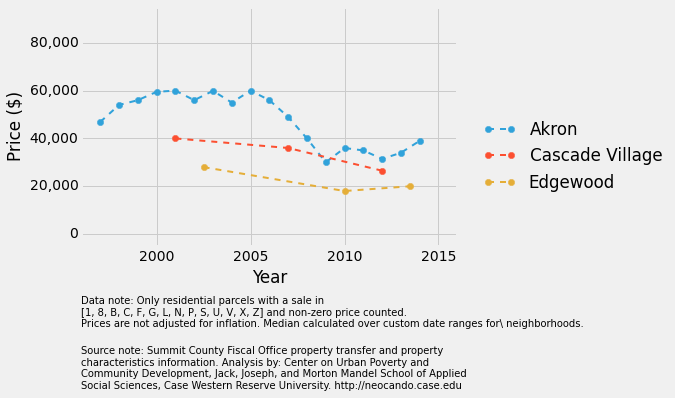

In [253]:
chart3_3 = pd.DataFrame(index=ak_by_year.index)
chart3_3['ak_median_custom'] = ak_by_year.sale_price['median']
chart3_3.loc[chart3_3.index.isin(cv2.middle_year.values),'cv_median_custom'] = (cv2['median']).values
chart3_3.loc[chart3_3.index.isin([2003,2010,2014]),'ed_median_custom'] =  (ed2['median']).values
chart3_3.to_csv('charts/chart3-3.csv')

ax = plt.subplot(111)
plt.plot(ak_by_year.index, ak_by_year.sale_price['median'],  '.--', markersize=12,linewidth=2)
plt.plot(cv2.middle_year, cv2['median'], '.--', markersize=12,linewidth=2)
plt.plot(ed2.middle_year, ed2['median'], '.--', markersize=12,linewidth=2)

plt.legend(['Akron','Cascade Village','Edgewood'], loc=(1.05,0.2))
plt.xlabel('Year')
plt.ylabel('Price ($)')
plt.xlim([1996,2016])
plt.ylim(-5000,95000)
ax.get_yaxis().set_major_formatter(plt.matplotlib.ticker.FuncFormatter(lambda x, p: format(int(x), ',')))

plt.annotate("Data note: Only residential parcels with a sale in \n\
[1, 8, B, C, F, G, L, N, P, S, U, V, X, Z] and non-zero price counted.\n\
Prices are not adjusted for inflation. Median calculated over custom date ranges for\ neighborhoods.", (0,0), (0, -50), fontsize=10, xycoords='axes fraction', textcoords='offset points', va='top')

plt.annotate("Source note: Summit County Fiscal Office property transfer and property \n\
characteristics information. Analysis by: Center on Urban Poverty and \n\
Community Development, Jack, Joseph, and Morton Mandel School of Applied \n\
Social Sciences, Case Western Reserve University. http://neocando.case.edu", (0,0), (0, -100), fontsize=10, xycoords='axes fraction', textcoords='offset points', va='top')

plt.savefig('charts/chart3-3.png',bbox_inches='tight')

##Chart 2-3: residential turnover by custom time periods (custom valid sales)

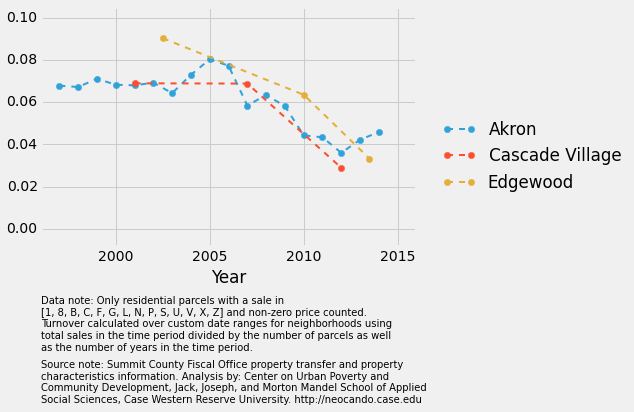

In [254]:
chart2_3 = pd.DataFrame(index=ak_by_year.index)
chart2_3['ak_turnover_custom'] = ak_by_year.sale_price['len']/len(set(df[df.akron==1].parcel_id))
chart2_3.loc[chart2_3.index.isin(cv2.middle_year.values),'cv_turnover_custom'] = (cv2['total']*1.0/cv2['years']/len(set(df[df.cascade_village==1].parcel_id))).values
chart2_3.loc[chart2_3.index.isin([2003,2010,2014]),'ed_turnover_custom'] =  (ed2['total']*1.0/ed2['years']/len(set(df[df.edgewood==1].parcel_id))).values
chart2_3.to_csv('charts/chart2-3.csv')

ax = plt.subplot(111)
plt.plot(ak_by_year.index, ak_by_year.sale_price['len']/len(set(df[(df.akron==1) & (df.CLASS=='R')].parcel_id)),  '.--', markersize=12,linewidth=2)
plt.plot(cv2.middle_year, cv2['total']*1.0/cv2['years']/len(set(df[(df.cascade_village==1) & (df.CLASS=='R')].parcel_id)), '.--', markersize=12,linewidth=2)
plt.plot(ed2.middle_year, ed2['total']*1.0/ed2['years']/len(set(df[(df.edgewood==1) & (df.CLASS=='R')].parcel_id)), '.--', markersize=12,linewidth=2)

plt.legend(['Akron','Cascade Village','Edgewood'], loc=(1.05,0.2))
plt.xlabel('Year')

plt.xlim([1996,2016])
plt.ylim([-0.008,0.105])

plt.annotate("Data note: Only residential parcels with a sale in \n\
[1, 8, B, C, F, G, L, N, P, S, U, V, X, Z] and non-zero price counted.\n\
Turnover calculated over custom date ranges for neighborhoods using \n\
total sales in the time period divided by the number of parcels as well \n\
as the number of years in the time period.", (0,0), (0, -50), fontsize=10, xycoords='axes fraction', textcoords='offset points', va='top')

plt.annotate("Source note: Summit County Fiscal Office property transfer and property \n\
characteristics information. Analysis by: Center on Urban Poverty and \n\
Community Development, Jack, Joseph, and Morton Mandel School of Applied \n\
Social Sciences, Case Western Reserve University. http://neocando.case.edu", (0,0), (0, -114), fontsize=10, xycoords='axes fraction', textcoords='offset points', va='top')

plt.savefig('charts/chart2-3.png',bbox_inches='tight')